<a href="https://colab.research.google.com/github/BachokunIAR/electriccity_price_prediction/blob/main/electricity_normalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload_file = files.upload()

Saving electricity-normalized.txt to electricity-normalized (1).txt


In [ ]:
!ls


'electricity-normalized (1).txt'   electricity-normalized.txt   sample_data


In [ ]:
cols = ['date','day','period','nswprice','nswdemand','vicprice','vicdemand','transfer','class1']
df =pd.read_csv(r'electricity-normalized.txt',names=cols)
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class1
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [ ]:
df.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,4.003178,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526
std,0.340308,1.998695,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,2.000000,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912
50%,0.456329,4.000000,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912
75%,0.880547,6.000000,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class1     45312 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB


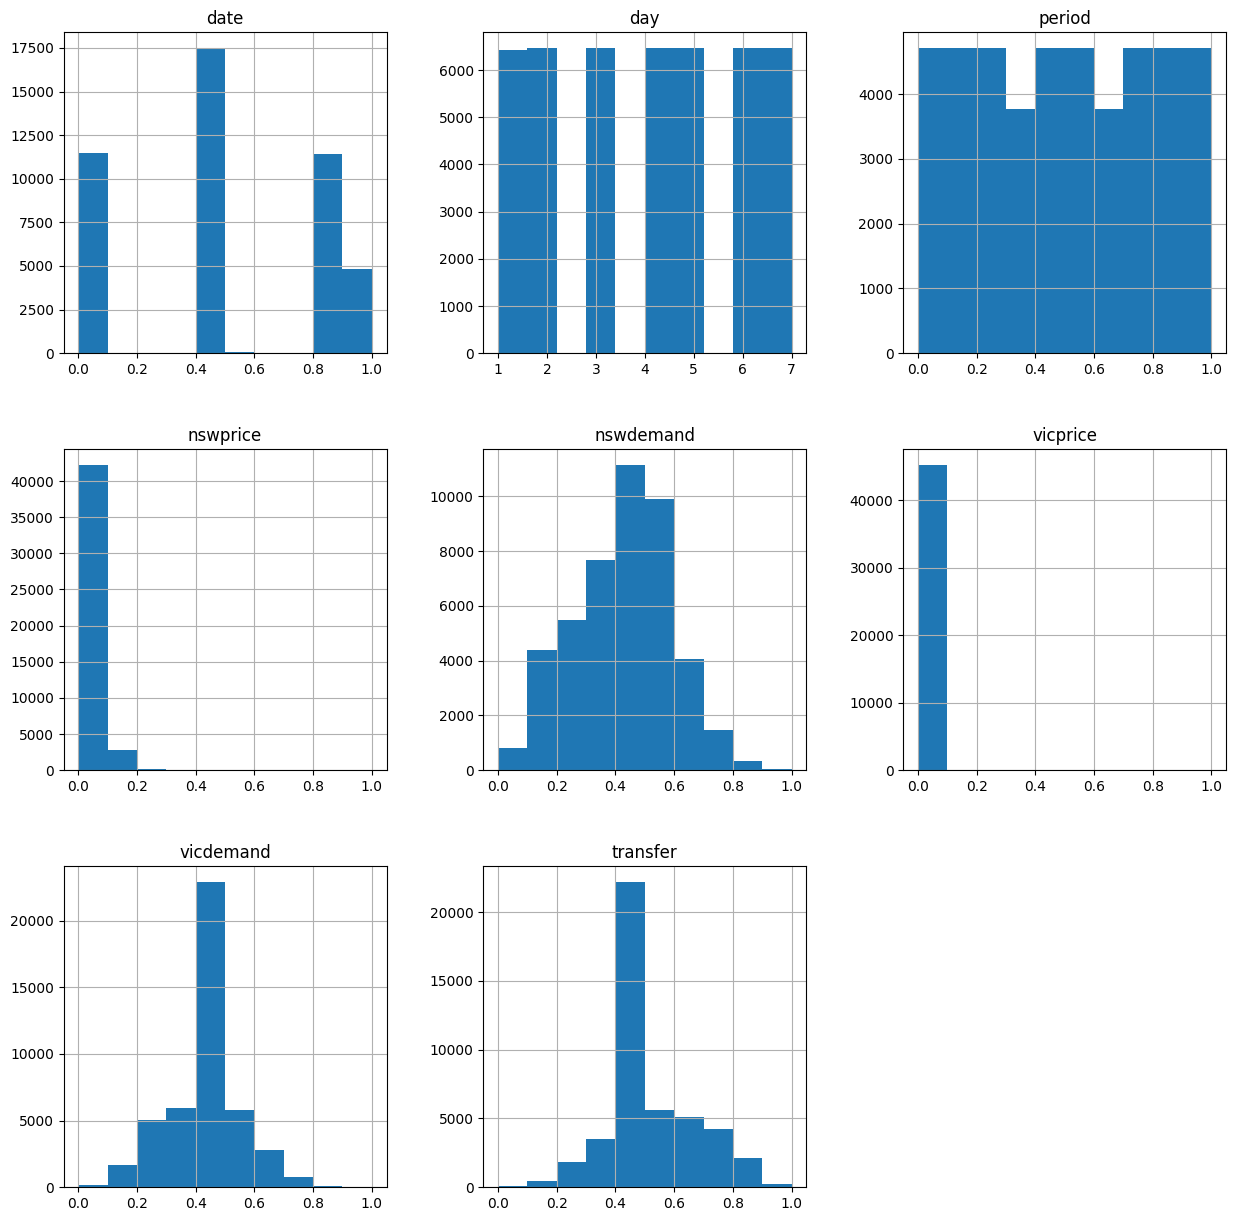

In [ ]:
plt.rcParams['figure.figsize'] = [15,15]
df.hist();

In [ ]:
df['class1'].unique()

array(['UP', 'DOWN'], dtype=object)

In [ ]:
df['class1'] =df['class1'].map({'UP':1,
                               'DOWN':0})
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class1
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,1
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,1
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,1
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,1
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,0


In [ ]:
x = df[['date','day','period','nswprice','nswdemand','vicprice','vicdemand','transfer']]
x.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912


In [ ]:
y = df['class1']
y

0        1
1        1
2        1
3        1
4        0
        ..
45307    0
45308    0
45309    0
45310    1
45311    0
Name: class1, Length: 45312, dtype: int64

In [ ]:
x.corr()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
date,1.000000e+00,4.846469e-03,-1.331142e-15,-0.151428,0.066748,0.003225,0.055323,0.405012
day,4.846469e-03,1.000000e+00,3.751487e-18,0.003292,-0.052672,0.000123,0.077716,-0.056159
period,-1.331142e-15,3.751487e-18,1.000000e+00,0.104155,0.445547,0.023245,0.192945,-0.116979
nswprice,-1.514277e-01,3.291678e-03,1.041553e-01,1.000000,0.304952,0.286072,0.307275,-0.275001
nswdemand,6.674768e-02,-5.267197e-02,4.455472e-01,0.304952,1.000000,0.086393,0.668501,-0.267897
vicprice,3.224591e-03,1.226526e-04,2.324549e-02,0.286072,0.086393,1.000000,0.127553,-0.084166
vicdemand,5.532348e-02,7.771631e-02,1.929449e-01,0.307275,0.668501,0.127553,1.000000,-0.555525
transfer,4.050120e-01,-5.615873e-02,-1.169790e-01,-0.275001,-0.267897,-0.084166,-0.555525,1.000000


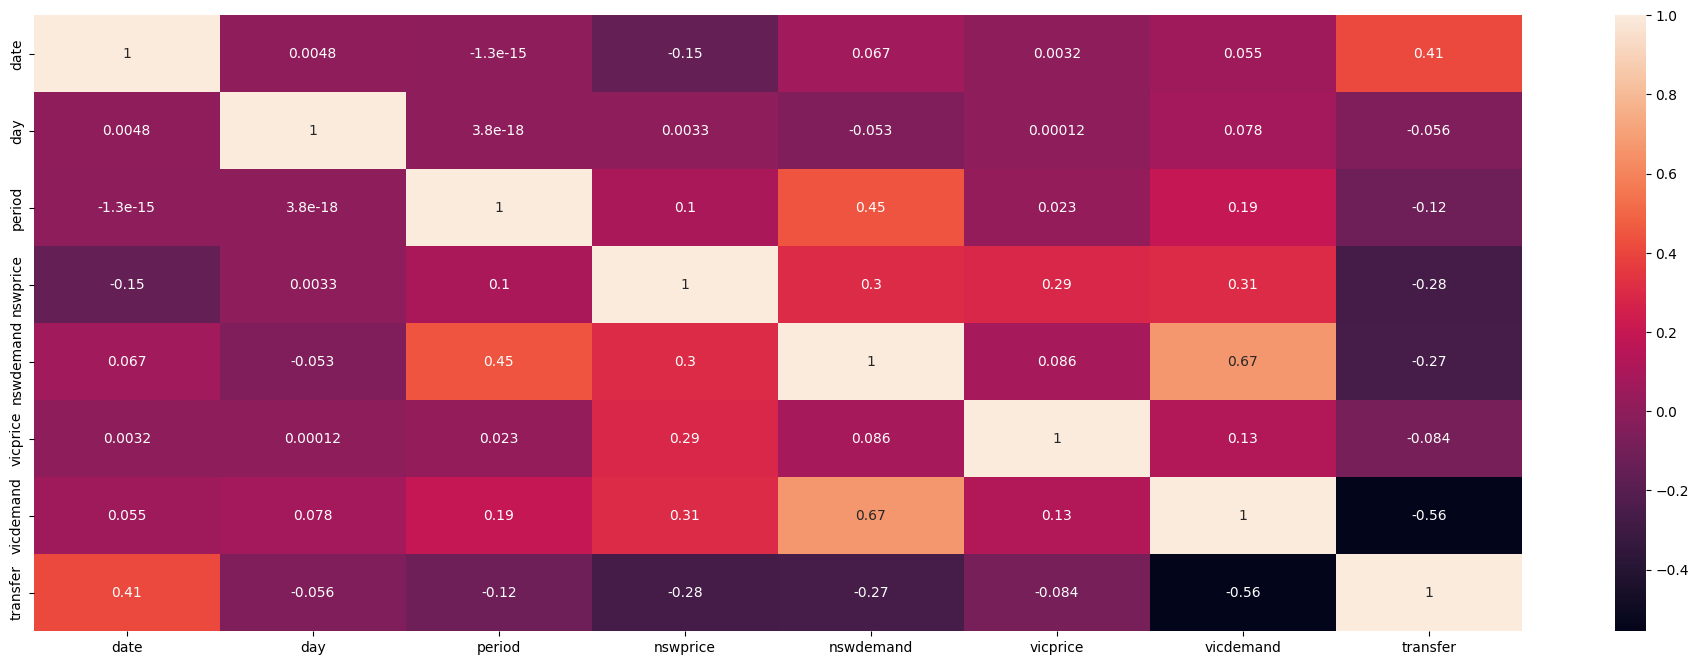

In [ ]:
plt.figure(figsize=(24,8))
sns.heatmap(x.corr(),annot =True);

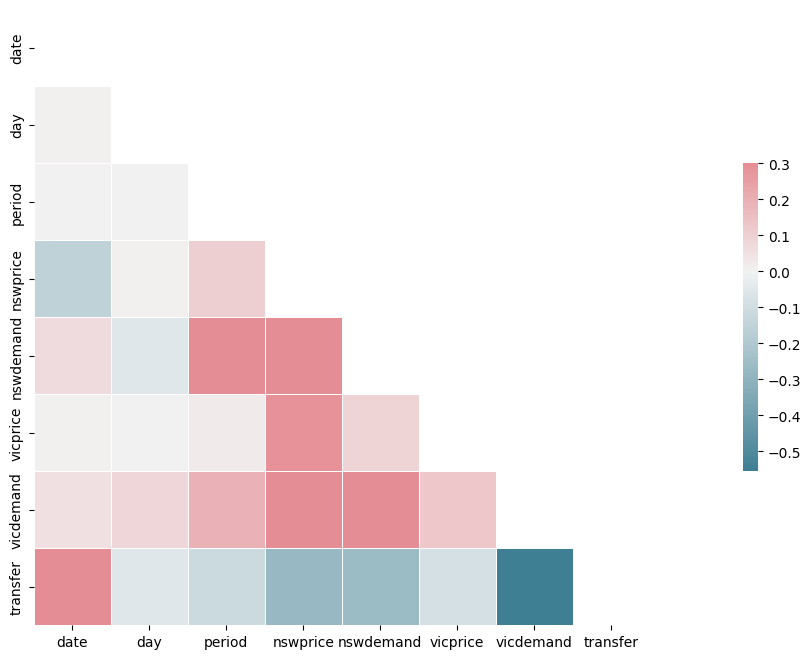

In [ ]:
import numpy as np
plt.figure(figsize=(24,8))
#  mask for the upper triangle
mask = np.zeros_like(x.corr(), dtype=bool)
mask[np.triu_indices_from(mask)]=True
# generate a custom diverging colormap

cmap = sns.diverging_palette(220,10,as_cmap=True)

# heatmap with mask and correct aspect ratio
sns.heatmap(x.corr(),mask = mask, cmap = cmap, vmax = .3, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink':.5});

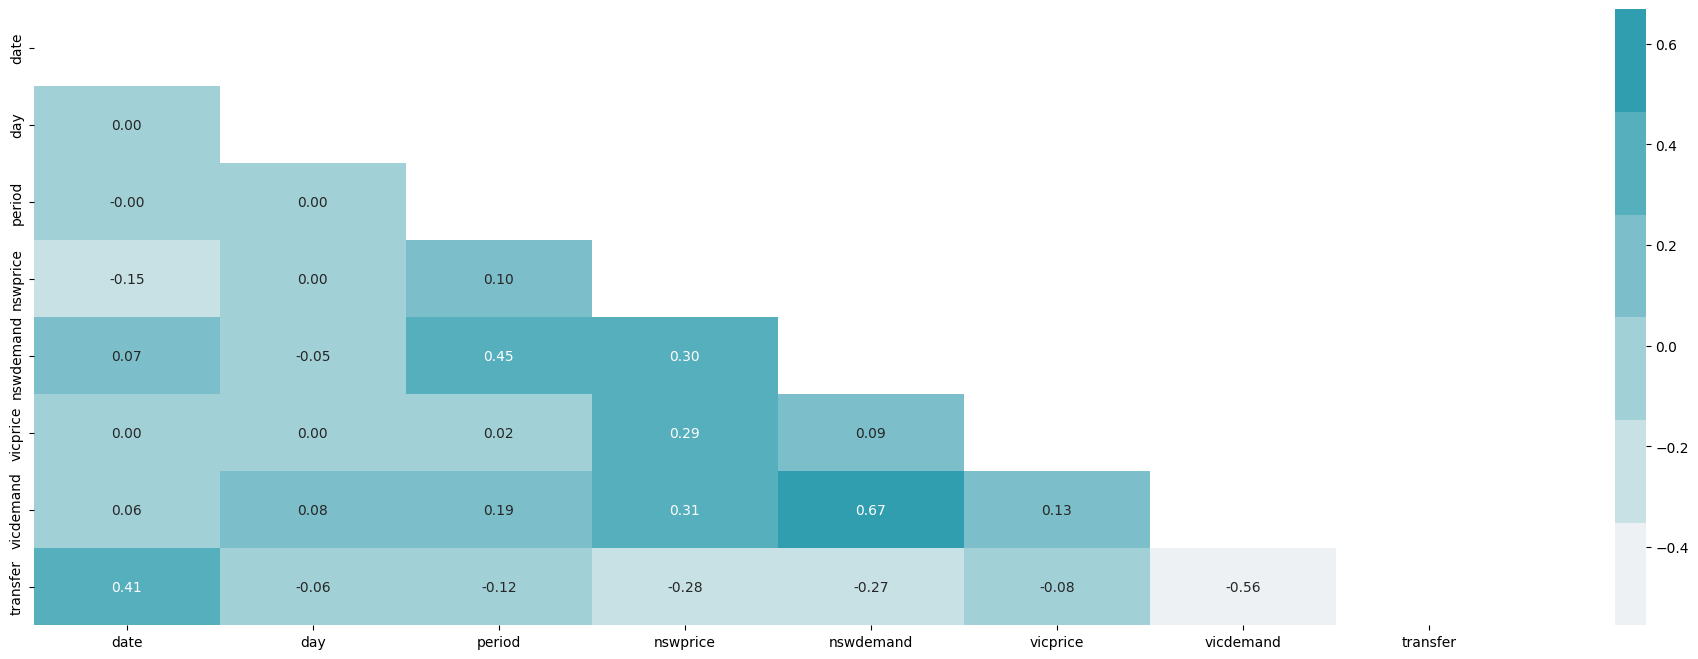

In [ ]:
plt.figure(figsize=(24,8))
#  mask for the upper triangle
mask = np.zeros_like(x.corr(), dtype=bool)
mask[np.triu_indices_from(mask)]=True
# generate a custom diverging colormap

cmap = sns.light_palette((210,90,60), input = 'husl')

# heatmap with mask and correct aspect ratio
sns.heatmap(x.corr(),mask = mask, cmap = cmap, annot = True, fmt = ".2f");

### Train ,Validation, test datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train , valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe):
    x = dataframe[dataframe.cols[:-1]].values
    y = dataframe[dataframe.cols[-1]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    data = np.hstack((x,np.reshape(y,(-1,1))))
    return data, x,y

In [ ]:
train # train data

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class1
14408,0.433432,1,0.170213,0.043053,0.139839,0.003467,0.422915,0.414912,0
7717,0.022433,1,0.787234,0.089618,0.515025,0.003467,0.422915,0.414912,1
3189,0.009070,5,0.446809,0.090098,0.692949,0.003467,0.422915,0.414912,1
24428,0.460997,6,0.936170,0.029843,0.430675,0.002046,0.306836,0.416667,0
36891,0.889607,7,0.574468,0.085535,0.401815,0.002289,0.378301,0.659649,1
...,...,...,...,...,...,...,...,...,...
7942,0.022654,6,0.468085,0.104840,0.376674,0.003467,0.422915,0.414912,1
15050,0.434007,7,0.553191,0.055032,0.293068,0.003467,0.422915,0.414912,1
24155,0.460776,1,0.234043,0.027021,0.102350,0.001857,0.099430,0.402632,0
2261,0.005133,7,0.106383,0.042122,0.164981,0.003467,0.422915,0.414912,0


In [ ]:
valid # validation data

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class1
23278,0.459935,3,0.978723,0.046986,0.509967,0.003270,0.447437,0.272368,0
6543,0.018274,5,0.319149,0.047076,0.457156,0.003467,0.422915,0.414912,0
26670,0.469227,4,0.638298,0.054672,0.534216,0.003598,0.452356,0.469298,1
31528,0.872262,7,0.851064,0.032575,0.347813,0.002021,0.305282,0.836842,1
36681,0.889430,3,0.191489,0.027561,0.181791,0.001799,0.297514,0.717105,0
...,...,...,...,...,...,...,...,...,...
6581,0.018318,6,0.106383,0.043293,0.224636,0.003467,0.422915,0.414912,0
28155,0.473696,7,0.574468,0.055542,0.477090,0.003650,0.388141,0.836404,1
41902,0.903411,6,0.978723,0.085145,0.496132,0.005571,0.444070,0.591228,1
29483,0.867351,7,0.234043,0.024258,0.160369,0.001099,0.197307,0.902632,0


In [ ]:
test # test data

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class1
13847,0.429715,3,0.489362,0.085775,0.620500,0.003467,0.422915,0.414912,1
21758,0.455511,7,0.297872,0.037589,0.382327,0.000976,0.251942,0.658772,0
41752,0.903279,3,0.851064,0.038459,0.478875,0.002619,0.471517,0.345614,0
3518,0.009380,5,0.297872,0.041912,0.608599,0.003467,0.422915,0.414912,0
21824,0.455555,1,0.680851,0.028912,0.373252,0.001548,0.234593,0.867544,0
...,...,...,...,...,...,...,...,...,...
10200,0.030884,4,0.510638,0.102348,0.554002,0.003467,0.422915,0.414912,1
3138,0.009026,4,0.382979,0.090159,0.731479,0.003467,0.422915,0.414912,0
29809,0.867661,7,0.021277,0.038099,0.278489,0.001836,0.315898,0.727193,1
3160,0.009026,4,0.851064,0.090159,0.728206,0.003467,0.422915,0.414912,1


In [ ]:
print(len(train[train['class1']==1])) # UP
print(len(train[train['class1']==0])) # Down

11530
15657


## Oversamplng

We see a differnce in length between the '1' and '0' for the train data.
We need to oversample to make them have the same length.

In [ ]:
from imblearn.over_sampling import RandomOverSampler


In [ ]:
def scale_dataset(dataframe,oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x , y = ros.fit_resample(x,y)
    data = np.hstack((x,np.reshape(y,(-1,1))))
    return data, x,y

# <font color =red> Now the data has thesame numer of dataset for both UP and DOWN </font>

In [ ]:
train, xtrain, ytrain = scale_dataset(train, oversample=True)
valid, xvalid ,yvalid = scale_dataset(valid, oversample=False)
test, xtest, ytest = scale_dataset(test, oversample=False)

In [ ]:
sum(ytrain==0)

15657

In [ ]:
sum(ytrain==0)

15657

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain, ytest = train_test_split(x,y,train_size=0.8,random_state=0)

In [ ]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report
y_pred = dec_tree.predict(xtest)

In [ ]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      5223
           1       0.87      0.87      0.87      3840

    accuracy                           0.89      9063
   macro avg       0.89      0.89      0.89      9063
weighted avg       0.89      0.89      0.89      9063



In [ ]:
confusion_matrix(ytrain, dec_tree.predict(xtrain))

array([[20852,     0],
       [    0, 15397]])

In [ ]:
input_data = (0.429715,3,0.489362,0.085775,0.620500,0.003467,0.422915,0.414912)
input_data_np  =np.asarray(input_data)
input_data_re = input_data_np.reshape(1,-1)
pred = dec_tree.predict(input_data_re)
print(pred)
if(pred[0]==0):
  print('The price is Down')

else:
  print('The price is UP');


[1]
The price is UP


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:


input_data = (0.009026,4,0.382979,0.090159,0.731479,0.003467,0.422915,0.414912)
input_data_np  =np.asarray(input_data)
input_data_re = input_data_np.reshape(1,-1)
pred = dec_tree.predict(input_data_re)
print(pred)
if(pred[0]==0):
  print('The price is Down')

else:
  print('The price is UP');

[0]
The price is Down


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
